In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/AI4E_ML01'

/content/drive/MyDrive/AI4E_ML01


In [ ]:
!ls

 data_description.txt		 sample.csv
'gilat paper.csv'		 sample_submission.csv
'gilat paper.xlsx'		 test.csv
 HW_W7_Randomforest_Thao.ipynb	 train.csv
 linear.csv			 WA_Fn-UseC_-Telco-Customer-Churn.csv
 map.jpeg			 weather_forecast.csv
 nonLinear.csv


In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

# **Read data**

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

# **EDA**

**1. Df train**

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
missing_perc = df_train.isnull().sum()/ len(df_train) * 100 
print(missing_perc)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [ ]:
del_cols = missing_perc[missing_perc > 30].index


In [ ]:
df_train= df_train.drop(columns=del_cols)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
corr= df_train.corr()

<ipython-input-15-d9d8bd465044>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df_train.corr()


**Choose only columns with high correlation for training process**

<Axes: >

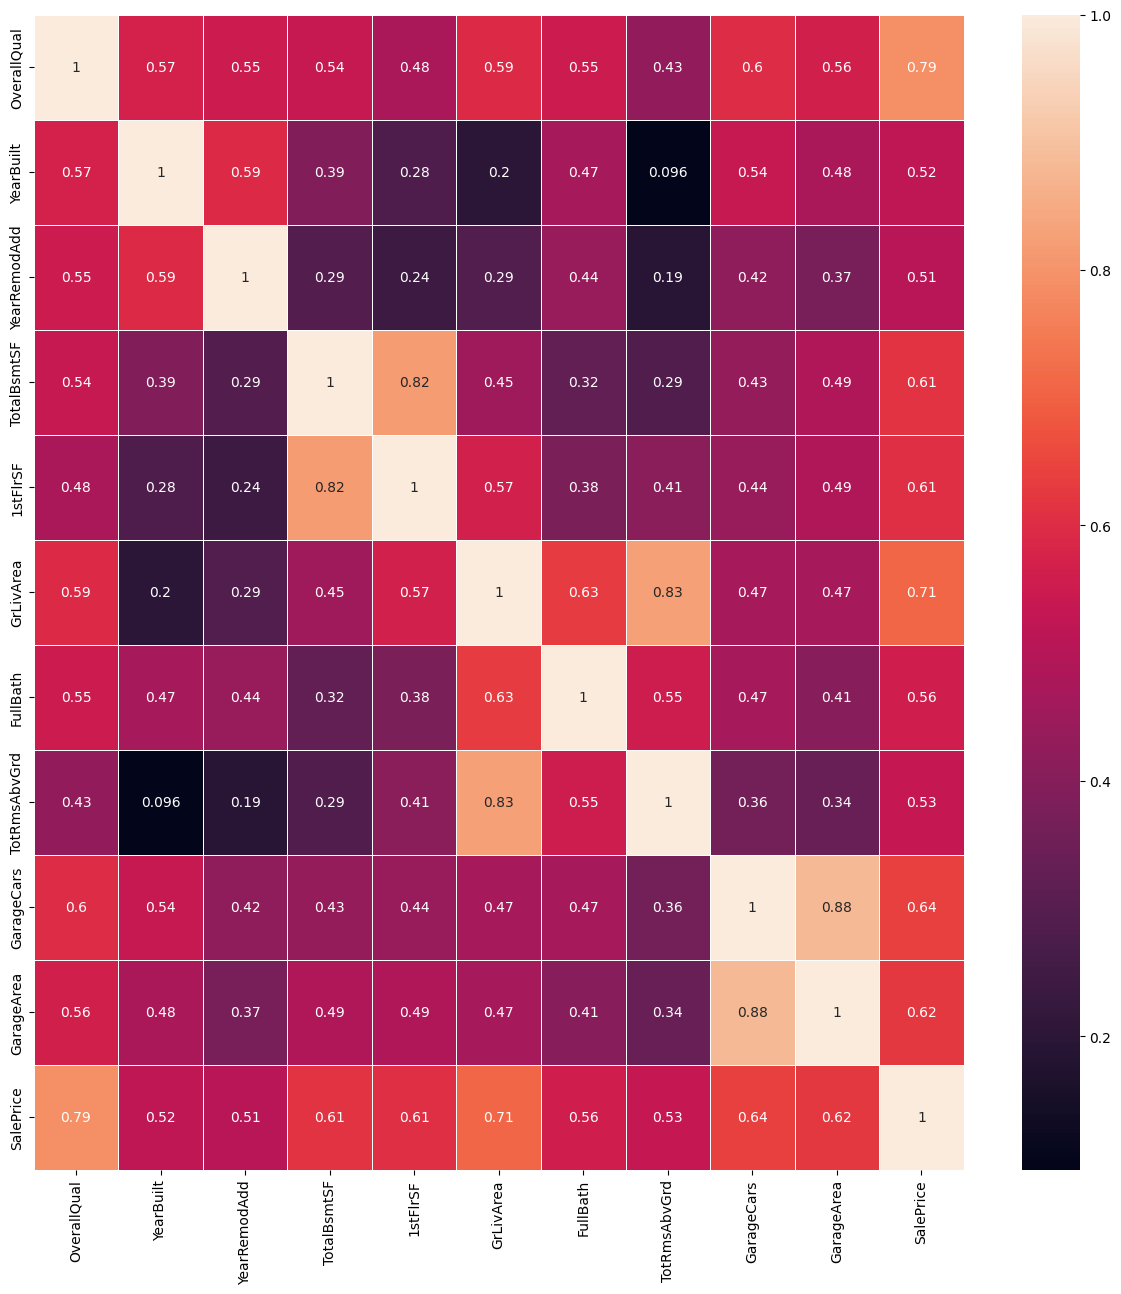

In [ ]:
highly_corr_var = corr.index[abs(corr['SalePrice'])>0.50]
plt.figure(figsize= (15,15))
sns.heatmap(df_train[highly_corr_var].corr(),annot=True, linewidth=.7)

In [ ]:
highly_corr_var

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [ ]:
#Final Df_train
df_train = df_train[['Id','OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF'
                     , 'FullBath', 'TotRmsAbvGrd', 'GarageArea','SalePrice',
                     'ExterQual', 'KitchenQual', 'BsmtQual', 'SaleCondition', 'SaleType','CentralAir']]

<Axes: >

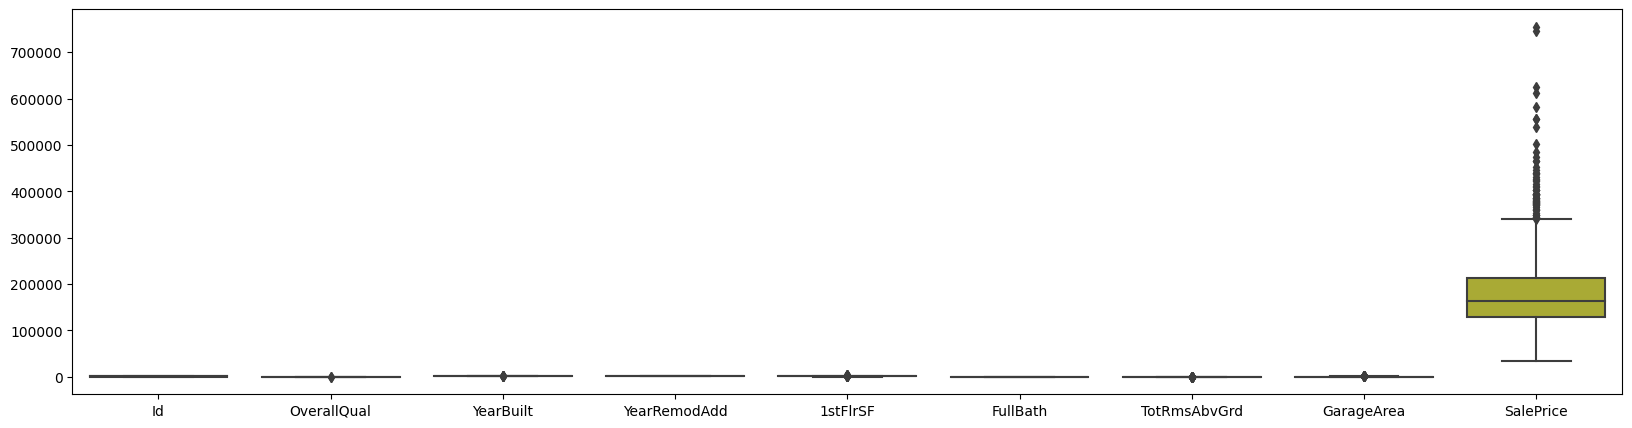

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_train)

In [ ]:
#Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = [col for col in df_train.columns if df_train[col].dtype in ['int64', 'float64']]

for col in num_cols:
    df_train[col] = scaler.fit_transform(df_train[[col]])

<Axes: >

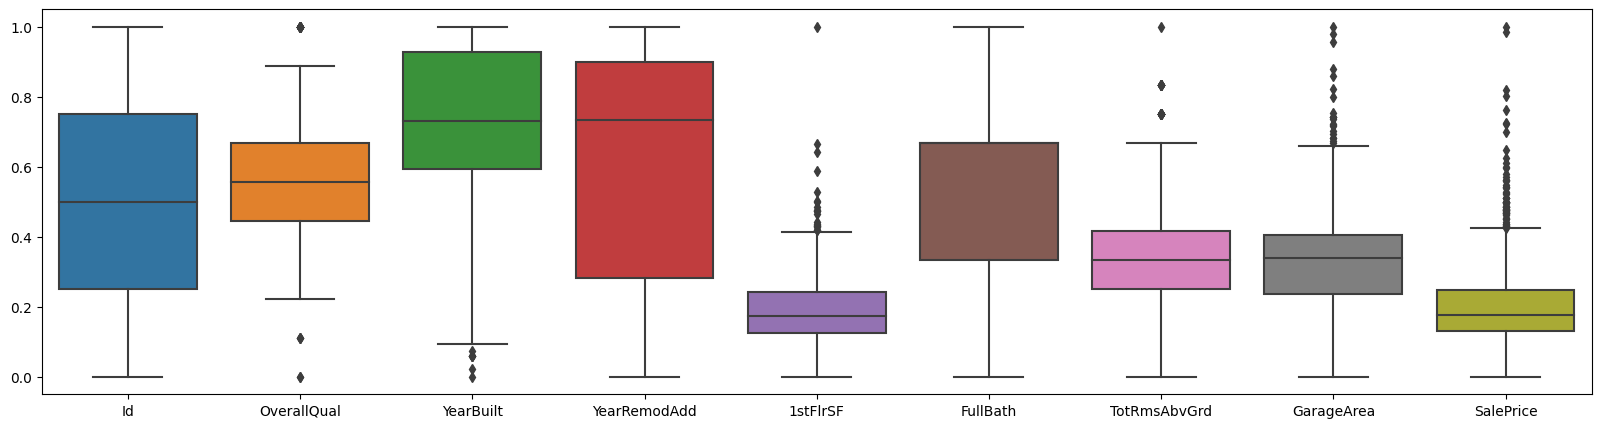

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_train)

In [ ]:
df_train.dtypes

Id               float64
OverallQual      float64
YearBuilt        float64
YearRemodAdd     float64
1stFlrSF         float64
FullBath         float64
TotRmsAbvGrd     float64
GarageArea       float64
SalePrice        float64
ExterQual         object
KitchenQual       object
BsmtQual          object
SaleCondition     object
SaleType          object
CentralAir        object
dtype: object

In [ ]:
df_train.columns

Index(['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice', 'ExterQual',
       'KitchenQual', 'BsmtQual', 'SaleCondition', 'SaleType', 'CentralAir'],
      dtype='object')

In [ ]:
# Define the columns to calculate outliers for
cols = ['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
        'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']

# Loop over the columns and calculate outliers
for col in cols:
    q1 = df_train[col].quantile(0.25)
    q3 = df_train[col].quantile(0.75)
    irq = q3 - q1
    outliers = df_train[(df_train[col] <= q1 - 1.5 * irq) | (df_train[col] >= q3 + 1.5 * irq)]
    perc_outliers = outliers.shape[0] * 100.0 / df_train.shape[0]
    print(f"Column {col} outliers = {perc_outliers:.2f}%")


Column Id outliers = 0.00%
Column OverallQual outliers = 1.58%
Column YearBuilt outliers = 0.48%
Column YearRemodAdd outliers = 0.00%
Column 1stFlrSF outliers = 1.37%
Column FullBath outliers = 0.00%
Column TotRmsAbvGrd outliers = 5.27%
Column GarageArea outliers = 1.44%
Column SalePrice outliers = 4.18%


In [ ]:
#Visualization
#Boxplot for all the categorical variables 

# Define the number of rows and columns for the grid
rows = 1
cols = 6

# Create a list of all categorical variable names
categorical_vars = df_train.select_dtypes(include='object').columns.tolist()

# Create a new figure and axis objects
fig, axes = plt.subplots(rows, cols, figsize=(30, 7))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the categorical variables and create boxplots in the grid
for i, var in enumerate(categorical_vars):
    sns.boxplot(x=var, y='SalePrice', data=df_train, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')

plt.show()

**2. Similar approaches for Df_test**

In [ ]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
missing_perc = df_test.isnull().sum()/ len(df_test) * 100 
print(missing_perc)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64


In [ ]:
del_cols = missing_perc[missing_perc > 30].index
df_test= df_test.drop(columns=del_cols)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
#Final Df_test
df_test = df_test[['Id','OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF'
                     , 'FullBath', 'TotRmsAbvGrd', 'GarageArea',
                     'ExterQual', 'KitchenQual', 'BsmtQual', 'SaleCondition', 'SaleType','CentralAir']]

In [ ]:
#Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = [col for col in df_test.columns if df_test[col].dtype in ['int64', 'float64']]

for col in num_cols:
    df_test[col] = scaler.fit_transform(df_test[[col]])

<Axes: >

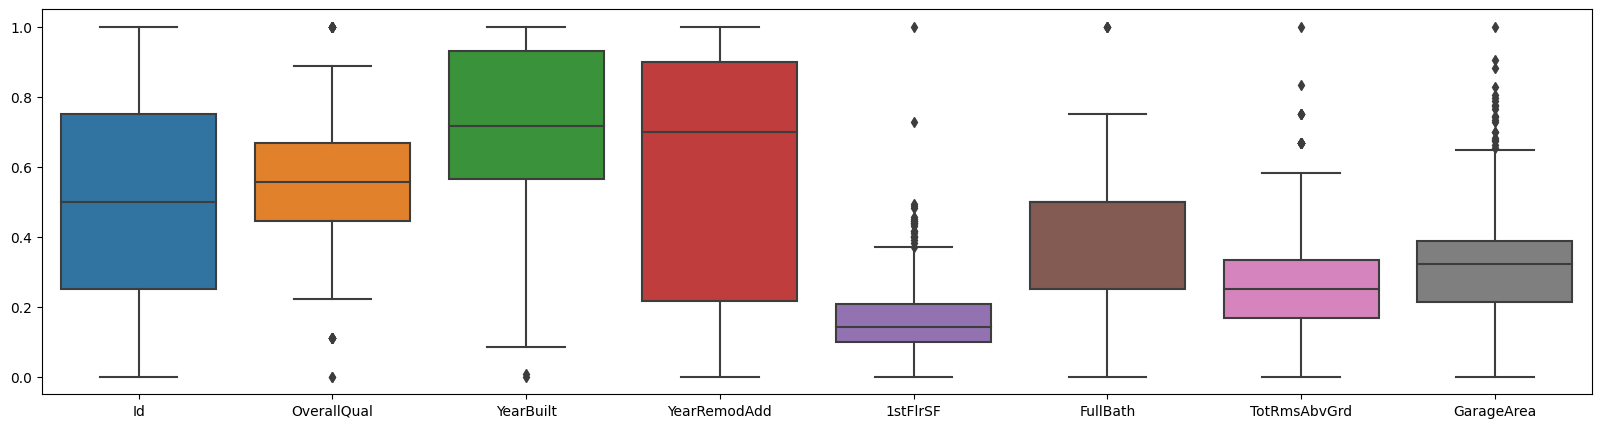

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_test)

# **Encoding, changing catergorical to numeric data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train = df_train.copy(deep = True)
text_data_features = [i for i in df_train.columns if i not in df_train.describe().columns]

print('Label Encoder Transformation')
for i in text_data_features :
    df_train[i] = le.fit_transform(df_train[i])
    print(i,' : ',df_train[i].unique(),' = ',le.inverse_transform(df_train[i].unique()))

Label Encoder Transformation
ExterQual  :  [2 3 0 1]  =  ['Gd' 'TA' 'Ex' 'Fa']
KitchenQual  :  [2 3 0 1]  =  ['Gd' 'TA' 'Ex' 'Fa']
BsmtQual  :  [2 3 0 4 1]  =  ['Gd' 'TA' 'Ex' nan 'Fa']
SaleCondition  :  [4 0 5 1 2 3]  =  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
SaleType  :  [8 6 0 3 4 1 5 2 7]  =  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
CentralAir  :  [1 0]  =  ['Y' 'N']


Scaling

In [ ]:
scaler = MinMaxScaler()

num_cols = [col for col in df_train.columns if df_train[col].dtype in ['int64', 'float64']]

for col in num_cols:
    df_train[col] = scaler.fit_transform(df_train[[col]])

In [ ]:
df_test = df_test.copy(deep = True)
text_data_features = [i for i in df_test.columns if i not in df_test.describe().columns]

print('Label Encoder Transformation')
for i in text_data_features :
    df_test[i] = le.fit_transform(df_test[i])
    print(i,' : ',df_test[i].unique(),' = ',le.inverse_transform(df_test[i].unique()))

Label Encoder Transformation
ExterQual  :  [3 2 0 1]  =  ['TA' 'Gd' 'Ex' 'Fa']
KitchenQual  :  [3 2 0 1 4]  =  ['TA' 'Gd' 'Ex' 'Fa' nan]
BsmtQual  :  [3 2 0 1 4]  =  ['TA' 'Gd' 'Ex' 'Fa' nan]
SaleCondition  :  [4 5 0 3 2 1]  =  ['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']
SaleType  :  [8 0 6 3 7 2 5 4 1 9]  =  ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan]
CentralAir  :  [1 0]  =  ['Y' 'N']


Scaling

In [ ]:
scaler = MinMaxScaler()

num_cols = [col for col in df_test.columns if df_test[col].dtype in ['int64', 'float64']]

for col in num_cols:
    df_test[col] = scaler.fit_transform(df_test[[col]])

# **Modelling**

In [ ]:
df_train.head()

Id  OverallQual  YearBuilt  YearRemodAdd  1stFlrSF  FullBath  \
0  0.000000     0.666667   0.949275      0.883333  0.119780  0.666667   
1  0.000685     0.555556   0.753623      0.433333  0.212942  0.666667   
2  0.001371     0.666667   0.934783      0.866667  0.134465  0.666667   
3  0.002056     0.666667   0.311594      0.333333  0.143873  0.333333   
4  0.002742     0.777778   0.927536      0.833333  0.186095  0.666667   

   TotRmsAbvGrd  GarageArea  SalePrice  ExterQual  KitchenQual  BsmtQual  \
0      0.500000    0.386460   0.241078   0.666667     0.666667      0.50   
1      0.333333    0.324401   0.203583   1.000000     1.000000      0.50   
2      0.333333    0.428773   0.261908   0.666667     0.666667      0.50   
3      0.416667    0.452750   0.145952   1.000000     0.666667      0.75   
4      0.583333    0.589563   0.298709   0.666667     0.666667      0.50   

   SaleCondition  SaleType  CentralAir  
0            0.8       1.0         1.0  
1            0.8       1.0         1.0  
2            0.8       1.0         1.0  
3            0.0       1.0         1.0  
4            0.8       1.0         1.0

In [ ]:
df_train.shape

(1460, 15)

In [ ]:
df_test.shape

(1459, 14)

In [ ]:
X = df_train.drop(columns = ['SalePrice'],axis=1)
y = df_train['SalePrice'].values

In [ ]:
validation_size = 0.3
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)
num_folds = 10

In [ ]:
X_train.shape, X_validation.shape

((1022, 14), (438, 14))

In [ ]:
y_train.shape, y_validation.shape


((1022,), (438,))

In [ ]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(1022, 1)

In [ ]:
y_validation = y_validation.reshape(-1, 1)
y_validation.shape

(438, 1)

# Fit với Random Forest Regressor và đưa ra dự đoán









In [ ]:
y_train = np.ravel(y_train)


In [ ]:
clf = RandomForestRegressor(n_estimators=100, random_state=seed)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_pred = clf.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
mape = mean_absolute_percentage_error(y_validation, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 0.002316743011983899
Root Mean Squared Error: 0.04813255667408391
Mean Absolute Error: 0.03157508092800404
Mean Absolute Percentage Error: 67.60375355494504


# **Model Tuning với GridsearchCV**

**Gridseach CV với RandomForestRegressor**






# **MAPE**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']}

In [ ]:
clf = RandomForestRegressor(random_state=seed)
grid_search_mape = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error',verbose=10)
grid_search_mape.fit(X_train, y_train)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV 1/3; 1/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.248 total time=   0.1s
[CV 2/3; 1/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.260 total time=   0.1s
[CV 3/3; 1/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-1005629647738.485 total time=   0.1s
[CV 1/3; 2/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 2/162] END max_depth=5, max_features=sqrt,

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=7),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_percentage_error', verbose=10)

In [ ]:
print("MAPE: Best parameters: ", grid_search_mape.best_params_)

MAPE: Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_param_grid={'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
clf = RandomForestRegressor(random_state=seed,**best_param_grid)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=200, random_state=7)

In [ ]:
y_pred = clf.predict(X_validation)
mape = mean_absolute_percentage_error(y_validation, y_pred)


print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 64.9280191357591


In [ ]:
print("MAPE: Best parameters: ", grid_search_mape.best_params_)
print("MAPE: Best score: ", grid_search_mape.best_score_)

MAPE: Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
MAPE: Best score:  -281923233001.2545


# **MSE**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']}

In [ ]:
clf = RandomForestRegressor(random_state=seed)
grid_search_mse = GridSearchCV(estimator=clf, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error',verbose=10)
grid_search_mse.fit(X_train, y_train)


Fitting 2 folds for each of 162 candidates, totalling 324 fits
[CV 1/2; 1/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/2; 1/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.003 total time=   0.2s
[CV 2/2; 1/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/2; 1/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.002 total time=   0.1s
[CV 1/2; 2/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/2; 2/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.003 total time=   0.3s
[CV 2/2; 2/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/2; 2/162] END max_depth=5, max_features=sqrt, min_sampl

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=7),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=10)

In [ ]:
print("MSE: Best parameters: ", grid_search_mse.best_params_)
print("MSE: Best score: ", -grid_search_mse.best_score_)

MSE: Best parameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
MSE: Best score:  0.0022385641426879163


# **RMSE**

In [ ]:
clf = RandomForestRegressor(random_state=seed)
grid_search_rmse = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error',verbose=10)
grid_search_rmse.fit(X_train, y_train)
print("RMSE: Best parameters: ", grid_search_rmse.best_params_)
print("RMSE: Best score: ", -grid_search_rmse.best_score_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV 1/3; 1/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.060 total time=   0.3s
[CV 2/3; 1/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.043 total time=   0.3s
[CV 3/3; 1/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.050 total time=   0.1s
[CV 1/3; 2/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 2/162] END max_depth=5, max_features=sqrt, min_samples

# **MAE**

In [ ]:
clf = RandomForestRegressor(random_state=seed)
grid_search_mae = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error',verbose=10)
grid_search_mae.fit(X_train, y_train)
print("MAE: Best parameters: ", grid_search_mae.best_params_)
print("MAE: Best score: ", -grid_search_mae.best_score_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV 1/3; 1/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.036 total time=   0.1s
[CV 2/3; 1/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.031 total time=   0.1s
[CV 3/3; 1/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1/162] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.033 total time=   0.1s
[CV 1/3; 2/162] START max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 2/162] END max_depth=5, max_features=sqrt, min_samples

# **Before Tuning:**

Mean Squared Error: 0.00231

Root Mean Squared Error: 0.0481

Mean Absolute Error: 0.0315

Mean Absolute Percentage Error: 67.60

# **After Tuning:**

Mean Squared Error: 0.00223

Root Mean Squared Error: 0.047080

Mean Absolute Error:  0.029381

Mean Absolute Percentage Error: 64.9280

